In [14]:
# Import Packages
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the image in grayscale
image = cv2.imread('./image.png', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Image not found or unable to open.")

### **Activity 1: Thresholding**

**Question:**
Thresholding is a gray-level transformation technique that enhances image contrast by modifying pixel intensity values based on a specified threshold $m$. Pixel values below the threshold are set to a lower intensity (commonly black), and values above the threshold are set to a higher intensity (commonly white). This produces a binary or high-contrast image that highlights specific features or regions of interest.

In other words, if a pixel value $r$ is:

-   $r < m$, then new pixel value $s = 0$ (black)
-   $r \geq m$, then new pixel value $s = L-1$ (white, where $L$ is max gray level, typically 255)

### **Explanation:**

-   Thresholding simplifies an image by converting it to black and white based on the threshold value $m$.
-   It is useful for separating objects from the background, especially when there is a clear difference in intensity.
-   Choosing the right threshold $m$ is crucial — too low or too high can cause loss of important details.
-   This operation results in a binary image emphasizing important features for further processing, like object detection or segmentation.


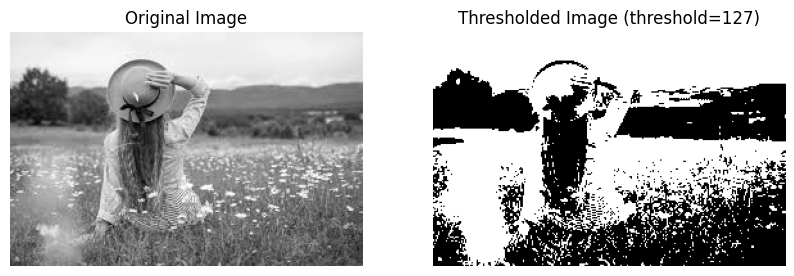

In [ ]:
threshold_value = 127  
_, thresh_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Plot the original and thresholded images
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(image, cmap='gray')

plt.subplot(1,2,2)
plt.title(f'Thresholded Image (threshold={threshold_value})')
plt.axis('off')
plt.imshow(thresh_image, cmap='gray')

plt.show()


### **Activity 2: Negative Transformation**

**Question:**
Negative transformation inverts the gray levels of an image. For an image with intensity values ranging from 0 to L – 1, the transformation is defined as:

$$
s = L - 1 - r
$$

where:

-   $r$ is the original pixel value
-   $L$ is the number of gray levels (usually 256 for 8-bit images)
-   $s$ is the transformed pixel value

This transformation reverses the intensity levels, making light areas appear dark and vice versa. It is useful for enhancing features in dark regions.

### **Explanation:**

-   The image is loaded in grayscale.
-   $L$ is set to 256 (for 8-bit images).
-   The negative transformation formula $s = L-1-r$ is applied pixel-wise.
-   The original and negative images are displayed along with their histograms to visualize the pixel intensity distribution before and after transformation.


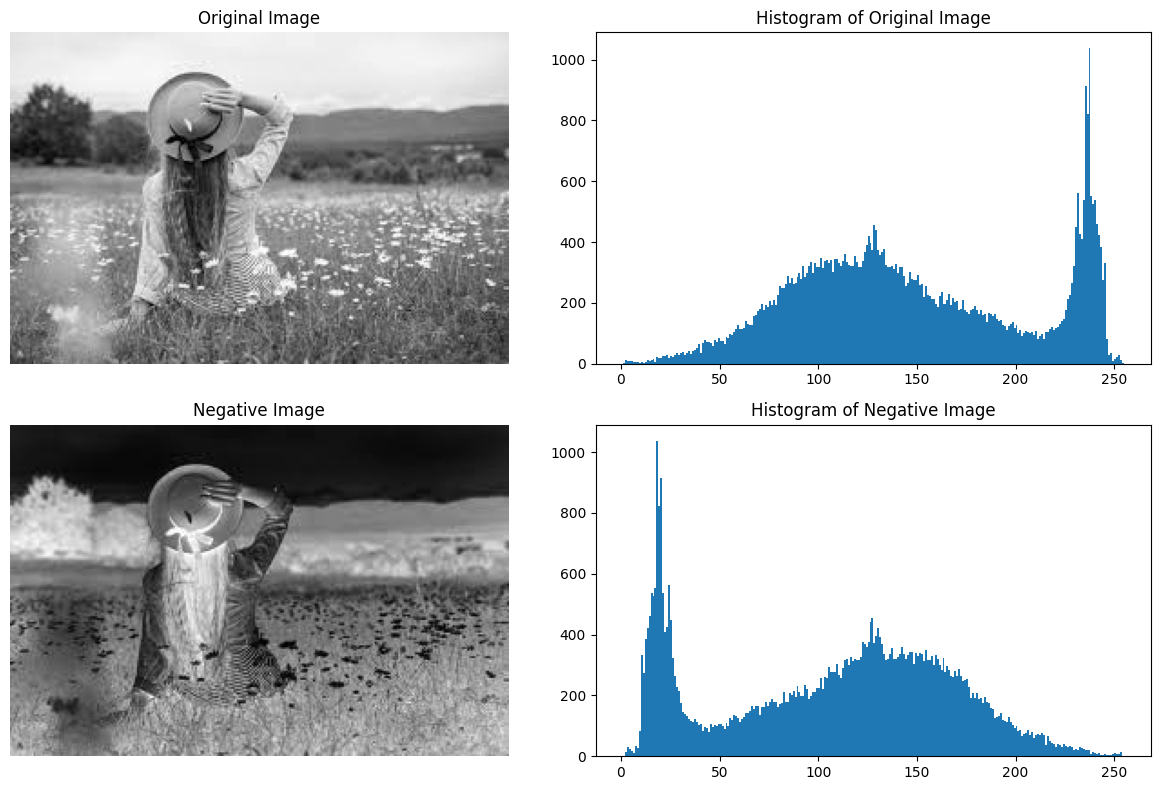

In [ ]:
L = 256
negative_image = L - 1 - image
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0,0].imshow(image, cmap='gray')
axes[0,0].set_title('Original Image')
axes[0,0].axis('off')

axes[0,1].hist(image.ravel(), bins=256, range=[0,256])
axes[0,1].set_title('Histogram of Original Image')

axes[1,0].imshow(negative_image, cmap='gray')
axes[1,0].set_title('Negative Image')
axes[1,0].axis('off')

axes[1,1].hist(negative_image.ravel(), bins=256, range=[0,256])
axes[1,1].set_title('Histogram of Negative Image')

plt.tight_layout()
plt.show()

### **Activity 3: Logarithmic Transformation**

**Question:**
Logarithmic transformation is used to expand the range of dark pixel values while compressing the range of bright ones. It is defined as:

$$
s = c \cdot \log(1 + r)
$$

where:

-   $r$ is the pixel intensity value (input)
-   $s$ is the output pixel value
-   $c$ is a constant to scale the output intensity values

This transformation is particularly effective for images with a large range of intensity values and improves detail visibility in darker areas.

### **Explanation:**

-   Image is loaded in grayscale.
-   We convert the image pixel values to `float` for accurate logarithmic calculation.
-   Calculate constant $c$ to normalize the output to 0-255 range.
-   Apply the log transform $s = c \times \log(1 + r)$ on each pixel.
-   Convert the resulting image back to 8-bit unsigned integer.
-   Show the original and the log-transformed images side-by-side.


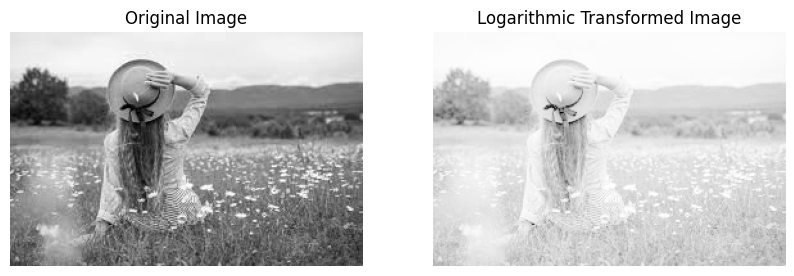

In [ ]:
image_float = image.astype(float)
c = 255 / np.log(1 + np.max(image_float))
log_image = c * np.log(1 + image_float)

log_image = np.array(log_image, dtype=np.uint8)

# Plot original and log transformed images
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(image, cmap='gray')

plt.subplot(1,2,2)
plt.title('Logarithmic Transformed Image')
plt.axis('off')
plt.imshow(log_image, cmap='gray')

plt.show()


### **Activity 4: Power-Law (Gamma) Transformation**

**Question:**
This transformation modifies the contrast of an image according to the equation:

$$
s = c \cdot r^{\gamma}
$$

where:

-   $r$ is the normalized pixel value (0 to 1)
-   $\gamma$ determines the degree of enhancement
-   $c$ is a scaling constant (often 1 for normalization)

Gamma correction is widely used in image enhancement to brighten or darken images.

### **Explanation:**

-   The image is loaded in grayscale.
-   Pixel values are normalized to \[0,1].
-   We define several gamma values to see different effects (less than 1 brightens, greater than 1 darkens).
-   For each gamma, the power-law transform $s = r^\gamma$ is applied.
-   Results are converted back to 8-bit scale.
-   Original and gamma-corrected images are plotted side-by-side for easy comparison.


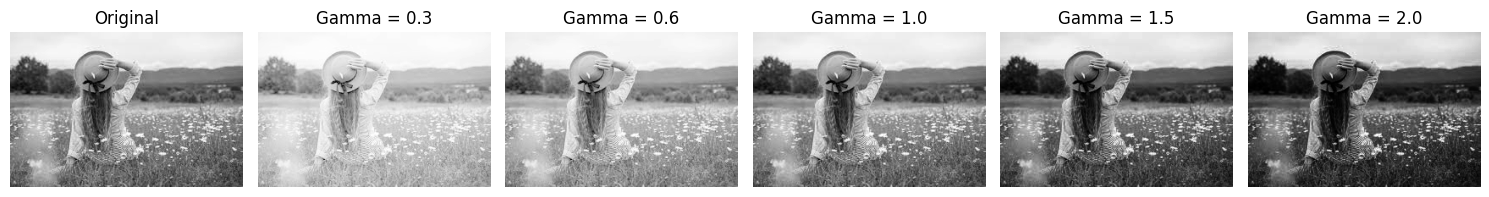

In [ ]:
image_norm = image / 255.0
gamma_values = [0.3, 0.6, 1.0, 1.5, 2.0]

plt.figure(figsize=(15, 5))

plt.subplot(1, len(gamma_values) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

for i, gamma in enumerate(gamma_values, start=2):
    gamma_corrected = np.power(image_norm, gamma)
    gamma_corrected = np.uint8(gamma_corrected * 255)

    plt.subplot(1, len(gamma_values) + 1, i)
    plt.imshow(gamma_corrected, cmap='gray')
    plt.title(f'Gamma = {gamma}')
    plt.axis('off')

plt.tight_layout()
plt.show()